In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [2]:
# Load Iris dataset
data = load_iris()
X = data.data
y = data.target


In [6]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# KFold setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_scores = cross_val_score(rf_model, X, y, cv=kf)

print("Random Forest CV Scores:", rf_scores)
print("Average RF Accuracy:", np.mean(rf_scores))



Random Forest CV Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Average RF Accuracy: 0.9600000000000002


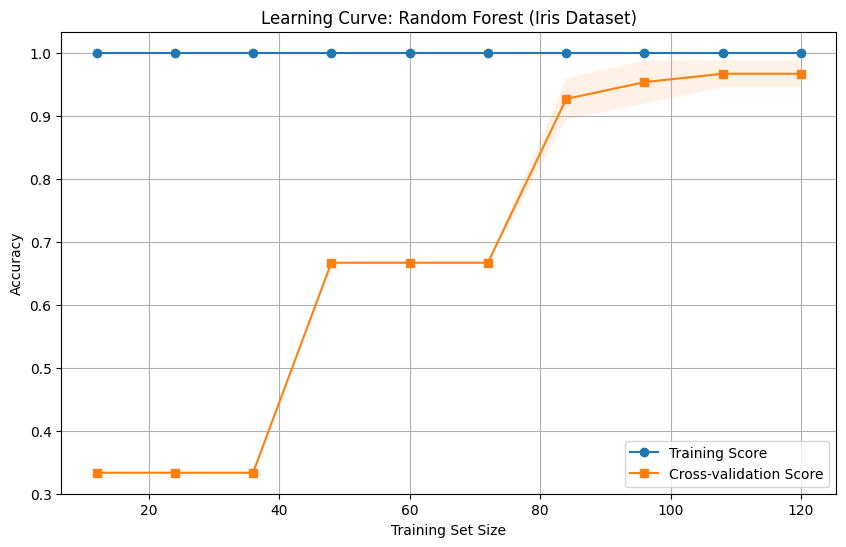

In [7]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 's-', label="Cross-validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve: Random Forest (Iris Dataset)")
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# SVM Model (RBF Kernel)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

svm_scores = cross_val_score(svm_model, X, y, cv=kf)

print("SVM CV Scores:", svm_scores)
print("Average SVM Accuracy:", np.mean(svm_scores))


SVM CV Scores: [1.         1.         0.93333333 0.93333333 0.96666667]
Average SVM Accuracy: 0.9666666666666668


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 207, in fit
    y = self._validate_targets(y)
      

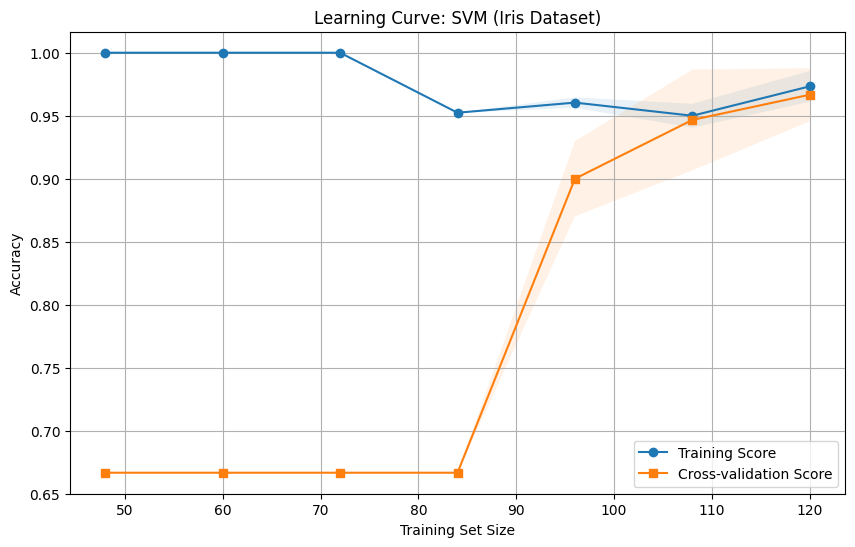

In [12]:
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 's-', label="Cross-validation Score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve: SVM (Iris Dataset)")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 4, 6, None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X, y)

print("Best Parameters:", grid.best_params_)
print("Best Score from GridSearchCV:", grid.best_score_)


Best Parameters: {'max_depth': 4, 'n_estimators': 50}
Best Score from GridSearchCV: 0.9666666666666668
